In [12]:
import networkx as nx
import gurobipy as gb
from IPython.display import SVG


In [32]:
G = nx.gnp_random_graph(500,0.1, seed=10)

print(G.number_of_nodes())
print(G.number_of_edges())
print(nx.density(G))

print(G.degree(1))


500
12280
0.09843687374749499
57


In [33]:
%matplotlib inline

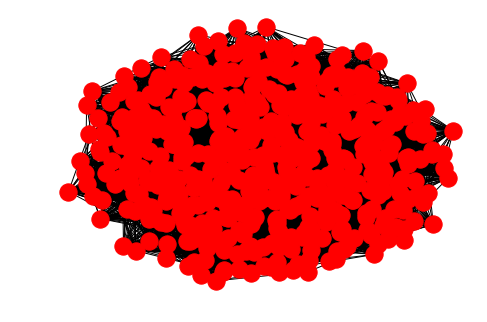

In [34]:
nx.draw_spring(G)

In [35]:

D = nx.nx_agraph.to_agraph(G)
D.node_attr.update (fontsize='8',  width=0.1, shape='circle')

#d.edge_attr.update(fontsize='10', arrowhead='vee', penwidth=0.2)
D.graph_attr.update(overlap='scale', sep='0.01')

#D.graph_attr.update(overlap='false', sep='3')

D.layout('neato')

D.draw('img.svg')
SVG('img.svg')

In [36]:
stableset = gb.Model()

x = stableset.addVars(G.number_of_nodes(),\
                      vtype=gb.GRB.BINARY,\
                      name='x')

stableset.setObjective(x.sum(),\
                       sense=gb.GRB.MAXIMIZE)


In [37]:
stableset.addConstrs((x[i] + x[j] <= 1\
                      for i,j in G.edges()),\
                     name='edge')

stableset.update()

stableset.write('stableset.lp')

#stableset.Params.MIPFocus = 0
#stableset.Params.BranchDir = 1
#stableset.Params.VarBranch = 3

#stableset.Params.Heuristics = 0

In [ ]:
stableset.optimize()

Optimize a model with 12280 rows, 500 columns and 24560 nonzeros
Variable types: 0 continuous, 500 integer (500 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 38.0000000
Presolve removed 7037 rows and 0 columns
Presolve time: 0.12s
Presolved: 5243 rows, 500 columns, 16984 nonzeros
Variable types: 0 continuous, 500 integer (500 binary)
Presolved: 500 rows, 5743 columns, 17484 nonzeros

Presolve removed 500 rows and 5743 columns

Root relaxation: objective 1.248878e+02, 12324 iterations, 0.87 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0  124.88780    0  500   38.00000  124.88780   229%     -    1s
H    0     0                      39.0000000  124.88780   220%     -    1s
     0     0  124.73954    0  500   3

 15189 13606   83.79454  125  310   51.00000  114.91055   125%   355  592s
 15524 13942   76.27751  151  262   51.00000  114.91055   125%   356  600s
 15964 14351   70.61126  187  247   51.00000  114.91055   125%   356  611s
 16429 14782   57.84807  243  185   51.00000  114.74871   125%   354  619s
 16948 15263   85.03564  102  309   51.00000  114.74871   125%   352  633s
 17372 15644   62.88157  198  212   51.00000  114.54027   125%   349  642s
 17831 16088   85.89732  108  318   51.00000  114.50766   125%   347  651s
 18456 16666  102.25036   36  378   51.00000  114.46857   124%   344  660s
 18849 17051   74.39620  147  262   51.00000  114.40322   124%   343  670s
 19310 17472   74.15741   44  207   51.00000  114.39440   124%   343  678s
 19697 17833   84.69073  111  306   51.00000  114.34228   124%   343  687s
 20216 18319  100.24877   49  375   51.00000  114.30506   124%   341  695s
 20664 18759   74.33018  158  265   51.00000  114.25723   124%   340  703s
 21128 19199   62.27599  

In [30]:
print('Obj: %g' % stableset.objVal)

print ()

for i in G.nodes():
    if (x[i].x > 1e-6):
        n = D.get_node(i)
        n.attr['color'] = 'red'
        n.attr['style'] = 'filled'
        n.attr['fontcolor'] = 'white'
        

D.draw('img.svg')

Obj: 9



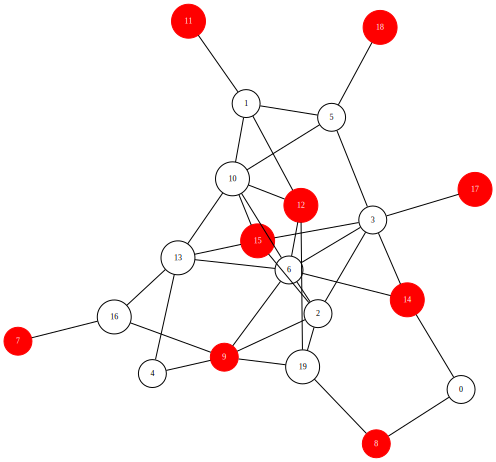

In [31]:
SVG('img.svg')